# Feature Interaction

When features interact with each other in a prediction model, the prediction cannot be expressed as the sum of the feature effects, because the effect of one feature depends on the value of the other feature. 

One way to estimate the interaction strength is to measure how much of the variation of the prediction depends on the interaction of the features. This measurement is called H-statistic

We are going to deal with two cases: First, a two-way interaction measure that tells us whether and to what extend two features in the model interact with each other; second, a total interaction measure that tells us whether and to what extend a feature interacts in the model with all the other features. In theory, arbitrary interactions between any number of features can be measured, but these two are the most interesting cases.

# Feature Interaction in gbmi

In [1]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import pandas as pd
from sklearn_gbmi import *

In [3]:
DATA_COUNT = 10000
RANDOM_SEED = 137
TRAIN_FRACTION = 0.9

In [4]:
np.random.seed(RANDOM_SEED)
xs = pd.DataFrame(np.random.uniform(size = (DATA_COUNT, 3)))
xs.columns = ['x0', 'x1', 'x2']
y = pd.DataFrame(xs.x0*xs.x1 + xs.x2 + pd.Series(0.1*np.random.randn(DATA_COUNT)))
y.columns = ['y']

In [5]:
train_ilocs = range(int(TRAIN_FRACTION*DATA_COUNT))
test_ilocs = range(int(TRAIN_FRACTION*DATA_COUNT), DATA_COUNT)
gbr_1 = GradientBoostingRegressor(random_state = RANDOM_SEED)
gbr_1.fit(xs.iloc[train_ilocs], y.y.iloc[train_ilocs])
gbr_1.score(xs.iloc[test_ilocs], y.y.iloc[test_ilocs])

0.9226936169364505

inspect the feature importances and plot the partial dependences on single predictor variables and pairs of predictor variables. We expect roughly equal feature importances and roughly linear partial dependences except on the pair (x0, x1), which combine nonadditively.

In [8]:
gbr_1.feature_importances_

array([0.18417467, 0.18540617, 0.63041915])

E:\programs\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; The function ensemble.plot_partial_dependence has been deprecated in favour of sklearn.inspection.plot_partial_dependence in  0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
E:\programs\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
E:\programs\python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function partial_dependence is deprecated; The function ensemble.partial_dependence has been deprecated in favour of inspection.partial_dependence in 0.21 and will be removed in 0.23.
  warnings.warn(msg, category=FutureWarning)
E:\programs\python\lib\site-packag

(<Figure size 432x288 with 3 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x12c1037a4c8>])

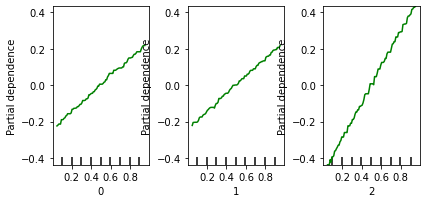

In [9]:
plot_partial_dependence(gbr_1, xs.iloc[train_ilocs], [0, 1, 2])